Convolutional Neural Networks

we will build a convolutional neural network for predicting the label of images which contain handwritten digits. The MNIST dataset is a widely used benchmarking dataset in the ML community, and consists of 70,000, 28x28 pixel images.

In [8]:
# Import tensorflow and load the MNIST image dataset

import tensorflow as tf
import numpy as np

# Dataset is split into 60,000 training images and 10,000 testing images
# Each image is given a label from (0,9), corresponding to the class
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.\
                                                mnist.load_data()


Check the data by plotting some of the images, using their class labels as image titles. Use subplots to display 10 of the images from the training set.

Convert the images to `dtype="float32"` and scale the pixels to a range of (0,255).

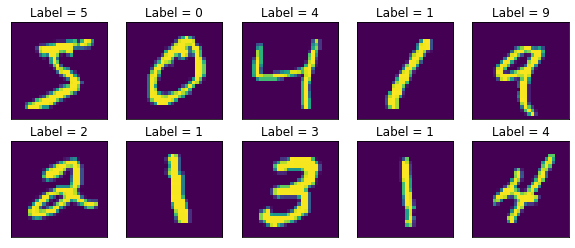

In [9]:
### Plot 10 of the training images in a (2,5) grid of subplots
### Use the image labels as titles on the subplots
# plt.subplots, axis.imshow, axis.set_title
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5, figsize=(10, 4))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(x_train[i,:,:])
    ax[i].set_title(f'Label = {y_train[i]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

In [10]:
### Convert the images to floats and scale the pixel to a range of
### (0,1). Reshape the images to shape (-1, 28, 28, 1).
# array.astype, np.reshape

x_train = np.reshape(x_train.astype('float32'), (-1, 28, 28, 1))/255.
x_test = np.reshape(x_test.astype('float32'), (-1, 28, 28, 1))/255.

A Convolutional Neural Network utilises convolutional layers to identify salient features within images—such as edges, curves, changes in brightness. Complete the following Keras Seuqential model so that it has these layers:

```
Input Layer - Shape = (28,28,1), dtype='float32'
Convoltuonal Layer - 32 filters, (1,1) stride, (3,3) kernel, 'relu' activation, 'same' padding
Max Pooling Layer - (2,2) pool size
Convoltuonal Layer - 32 filters, (1,1) stride, (3,3) kernel, 'relu' activation, 'same' padding
Max Pooling Layer - (2,2) pool size
Flattent Layer
Dense Layer - 64 units, 'relu' activation
Dense Layer - 10 units
```

Print the model summary.


In [27]:
### Create the layers for the CNN model, using the Functional API
# Input, Conv2D, MaxPool2D, Flatten, Dense

from tensorflow.keras import layers, models

Inp = layers.Input((28,28,1), dtype='float32', name='Model_Input')
Conv1 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_1')(Inp)
Pool1 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_1')(Conv1)
Conv2 = layers.Conv2D(32, (3,3), activation='relu',
                      padding='same', name='conv_2')(Pool1)
Pool2 = layers.MaxPool2D(pool_size=(2,2),
                         name='pool_2')(Conv2)
Flat = layers.Flatten()(Pool2)
Dense1 = layers.Dense(64, activation='relu', name='fc_1')(Flat)
Dense2 = layers.Dense(10, name='fc_2')(Dense1)


In [28]:
### Create the model, using the input and output tensors you have define above.
### Display the model summary.
# models.Model

mnist_model = models.Model(inputs=Inp, outputs=Dense2)
mnist_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Model_Input (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 32)        9248      
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 fc_1 (Dense)                (None, 64)                1004

Now we must prepare the model for training. Compile the model using the Adam Optimizer, Sparse Categorical Crossentropy loss `(from_logits=True)`, and the accuracy metric.

In [29]:
### Compile the model with the Adam optimizer, Sparse Categorical Crossentropy
### loss (from_logits=True), and the accuracy metric
# optimizers.Adam, losses.SparseCategoricalCrossentropy
from tensorflow.keras import losses, optimizers

mnist_model.compile(optimizer=optimizers.Adam(),
                    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

Train the model on the training data using the `.fit` method. Train for 25 epochs. Use the testing data for validation. Store the losses and metrics in the history object.

Plot the losses and metrics for the training and validation data. What do these plots tell us about the model performance? Why is the model better at classifying the training images? Has the model reached an optimal solution?

In [30]:
### Train the model for 25 epochs on the training images and labels
### Using the test images and labels as validation data

history = mnist_model.fit(x=x_train, y=y_train, epochs=25,
                          validation_data=(x_test, y_test),
                          batch_size=512)

# Keys inside the history dictionary.
print(history.history.keys)

Epoch 1/25
118/118 [==============================] - 3s 11ms/step - loss: 0.5488 - accuracy: 0.8554 - val_loss: 0.1594 - val_accuracy: 0.9548
Epoch 2/25
118/118 [==============================] - 1s 9ms/step - loss: 0.1149 - accuracy: 0.9658 - val_loss: 0.0825 - val_accuracy: 0.9752
Epoch 3/25
118/118 [==============================] - 1s 9ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.0556 - val_accuracy: 0.9818
Epoch 4/25
118/118 [==============================] - 1s 9ms/step - loss: 0.0574 - accuracy: 0.9829 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 5/25
118/118 [==============================] - 1s 9ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0406 - val_accuracy: 0.9859
Epoch 6/25
118/118 [==============================] - 1s 10ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 7/25
118/118 [==============================] - 1s 9ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoc

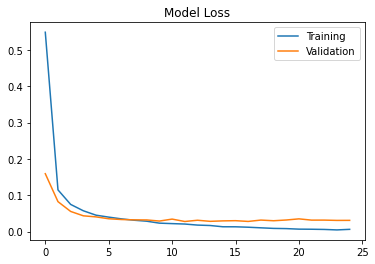

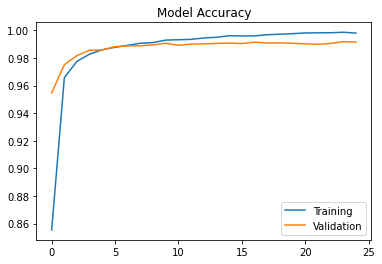

In [31]:
### Plot the losses and metrics for the training and validation data.
### These values are stored inside the history.history dictionary object.
### You should make two plots, one for the losses, and one for the metrics.

plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')

plt.show()

# Exercise 5

Currently, the output of our model is in the form of "logits", these are raw predictions that we can map to a probability for each of the 10 classes in our data. To do so, create a sequential model, where the first layer is the model you just trained—models can in fact be treated as layers in a higher level model—and the second layer is ```layers.Softmax()```.

In [33]:
### Add a softmax activation layer by creating a new seuqential model that
### takes the original model as the first layer in the list
# models.Sequential, layers.Softmax
import numpy as np

prediction_model = models.Sequential([mnist_model, layers.Softmax()])

The output of the model is now a 10-element vector for each image, which represents the probability distribution of the class labels.

Use the `.predict` method to calculate the probabilities of the images in the test sample.

Use the numpy function `argmax()` to find the highest probability class for the images.

In [36]:
### Use the .predict method to find the probabilities of each test image being
### within each of the 10 classes. Then find the highest probability class for
### each test image.
# .predict, np.argmax

y_pred = prediction_model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


Create a plot which displays images in a (5,5) grid, and show the ground truth and predicted class labels for each image as a title. (Extra challenge, choose the images at random, not in the order of the test set. Extra EXTRA challenge, create plots which have only images that are correctly or incorrectly predicted.)

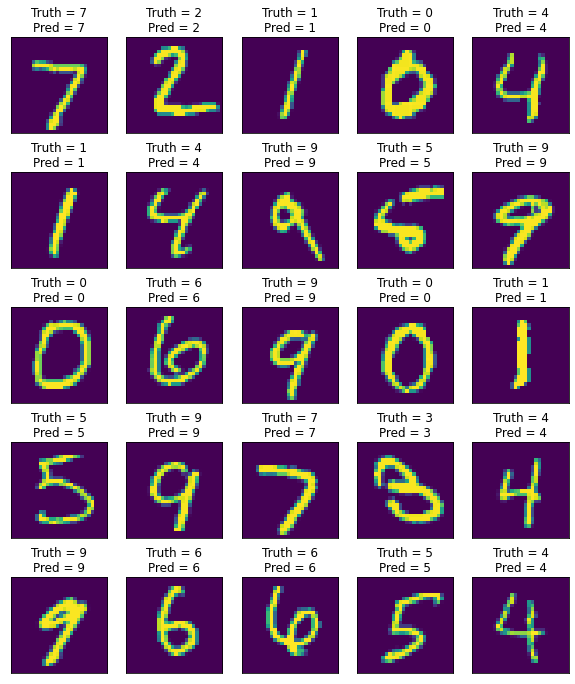

In [39]:
### Create a plot which displays images in a (5,5) grid, and show the ground
### truth and predicted class labels for each image as a title.

f, ax = plt.subplots(5,5, figsize=(10, 12))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(x_test[i,:,:,0])
    ax[i].set_title(f'Truth = {y_test[i]}\nPred = {y_pred_label[i]}')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()